# Multiple Regression

Shows how to calculate just the best fit, or - using "statsmodels" - all the
corresponding statistical parameters.

Also shows how to make 3d plots.

Author: Thomas Haslwanter, Date:   June-2014

In [1]:
# The standard imports
%pylab inline
import pandas as pd
# For the 3d plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For the statistic
from statsmodels.formula.api import ols

Populating the interactive namespace from numpy and matplotlib


## Generate and show the data

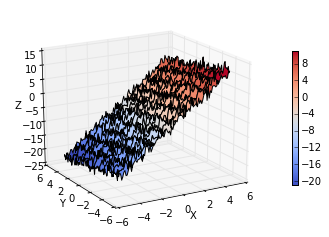

In [2]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)

## Simple plane fit

In [3]:
M = np.vstack((np.ones(len(X)), X, Y)).T
bestfit = np.linalg.lstsq(M,Z)[0]
print('Best fit plane:', bestfit)

Best fit plane: [[ -4.82056816e+12  -1.20416994e+13  -9.11181668e+12 ...,   9.61955013e+12
   -5.51414996e+12   3.31341380e+12]
 [  3.58757083e+12   1.82156195e+12   1.89644782e+13 ...,   2.03398505e+12
    1.01174716e+13  -1.91616495e+12]
 [  1.02022026e+12  -6.60793044e+11   4.94040802e+12 ...,  -2.07726626e+11
   -3.03436224e+12  -1.67784100e+13]
 ..., 
 [  5.05429934e+12   5.92757610e+12   2.03445229e+12 ...,  -1.09525507e+12
   -4.70897149e+12  -4.64282950e+11]
 [ -9.65404853e+11  -3.61008184e+12  -5.03088809e+12 ...,   1.03449512e+12
    4.82577024e+11   9.38807411e+11]
 [  3.44090551e+10   1.54794389e+12  -6.06936437e+11 ...,   4.59824092e+11
   -1.01547199e+12   1.07402781e+12]]


## Multilinear regression model

In [4]:
# calculate fit, P-values, confidence intervals etc.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})

# Fit the model
model = ols("z ~ x + y", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.985e+05
Date:                Mon, 20 Jul 2015   Prob (F-statistic):               0.00
Time:                        19:30:47   Log-Likelihood:                -14492.
No. Observations:               10201   AIC:                         2.899e+04
Df Residuals:                   10198   BIC:                         2.901e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.9995      0.010   -504.011      0.0